In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
print("Libraries imported successfully")


Libraries imported successfully


In [2]:
file_path ='../data/heart.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded from {file_path}")

df.head()

Dataset loaded from ../data/heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:

df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
# Get the number of rows and columns
df.shape
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
# Generate descriptive statistics for categorical columns
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [10]:
df.describe(include='int64')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000


In [11]:
# Count the number of rows with a value of 0 for RestingBP and Cholesterol
resting_bp_zeros = df[df['RestingBP'] == 0].shape[0]
cholesterol_zeros =df[df['Cholesterol'] == 0].shape[0]

print(f"Number  of patients with RestingBP = 0 : {resting_bp_zeros}")
print(f"Number of patients with Cholesterol = 0 : {cholesterol_zeros}")


Number  of patients with RestingBP = 0 : 1
Number of patients with Cholesterol = 0 : 172


In [12]:
# Replace 0 with NaN (Not a Number) in specified columns
# NaN is the standard way to represent missing data in pandas
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)

In [13]:
# Check how many missing values we now have in each column

print("Missing values after replacing 0s: ")
print(df.isnull().sum())

Missing values after replacing 0s: 
Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [14]:
# Create age categories using pd.cut
# This function segments and sorts data values into bins.
age_bins = [25,40, 50, 60, 80]
age_labels = ['Young Adult (25-40)', 'Middle Aged (41-50)', 'Senior (51-60)', 'Elderly (61-80)']
df['AgeGroup'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels, right = True)

#Display the first 10 rows with new columns
df[['Age', 'AgeGroup']].head(10)

,Age,AgeGroup
0,40,Young Adult (25-40)
1,49,Middle Aged (41-50)
2,37,Young Adult (25-40)
3,48,Middle Aged (41-50)
4,54,Senior (51-60)
5,39,Young Adult (25-40)
6,45,Middle Aged (41-50)
7,54,Senior (51-60)
8,37,Young Adult (25-40)
9,48,Middle Aged (41-50)


In [15]:
# Impute Cholesterol based on the median of the 'Sex' and 'AgeGroup'
# transform() is powerful: it performs a groupby operation but returns a Series aligned with the original DataFrame's index.
df['Cholesterol'] = df['Cholesterol'].fillna(df.groupby(['Sex', 'AgeGroup'])['Cholesterol'].transform('median'))

df['RestingBP'] = df['RestingBP'].fillna(df.groupby(['Sex', 'AgeGroup'])['RestingBP'].transform('median'))

#---Verification---
#Check if any NaNs remain
print("\nMissing values after conditional imputation:")
print(df.isnull().sum())


Missing values after conditional imputation:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
AgeGroup          0
dtype: int64


C:\Users\Krm\AppData\Local\Temp\ipykernel_24672\873665673.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Cholesterol'] = df['Cholesterol'].fillna(df.groupby(['Sex', 'AgeGroup'])['Cholesterol'].transform('median'))
C:\Users\Krm\AppData\Local\Temp\ipykernel_24672\873665673.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['RestingBP'] = df['RestingBP'].fillna(df.groupby(['Sex', 'AgeGroup'])['RestingBP'].transform('median'))


In [16]:
#Display the new descriptive statistics
df[['RestingBP', 'Cholesterol']].describe()

,RestingBP,Cholesterol
count,918.000000,918.000000
mean,132.538126,243.239651
std,17.990127,53.559527
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,236.000000
75%,140.000000,268.750000
max,200.000000,603.000000


In [17]:
#Drop the temporary helper column
df = df.drop(columns=['AgeGroup'])

C:\Users\Krm\AppData\Local\Temp\ipykernel_24672\3641379901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HeartDisease', data=df, palette='viridis')


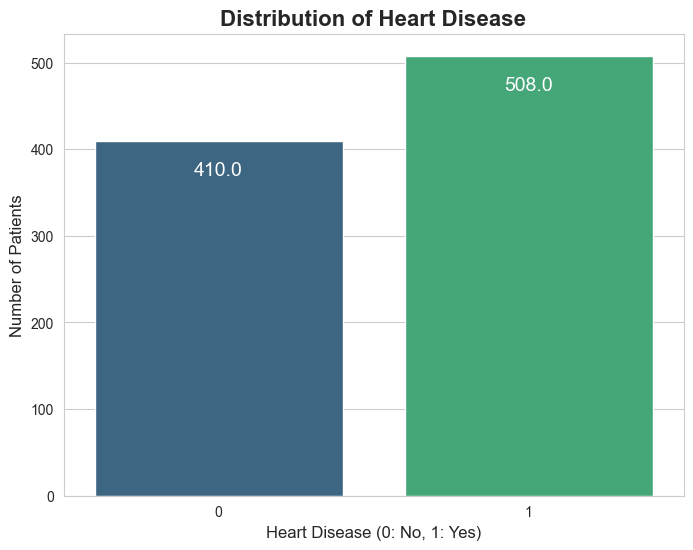

In [19]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create a count plot for the target variable
ax = sns.countplot(x='HeartDisease', data=df, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)

plt.title('Distribution of Heart Disease', fontsize=16, fontweight='bold')
plt.xlabel('Heart Disease (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

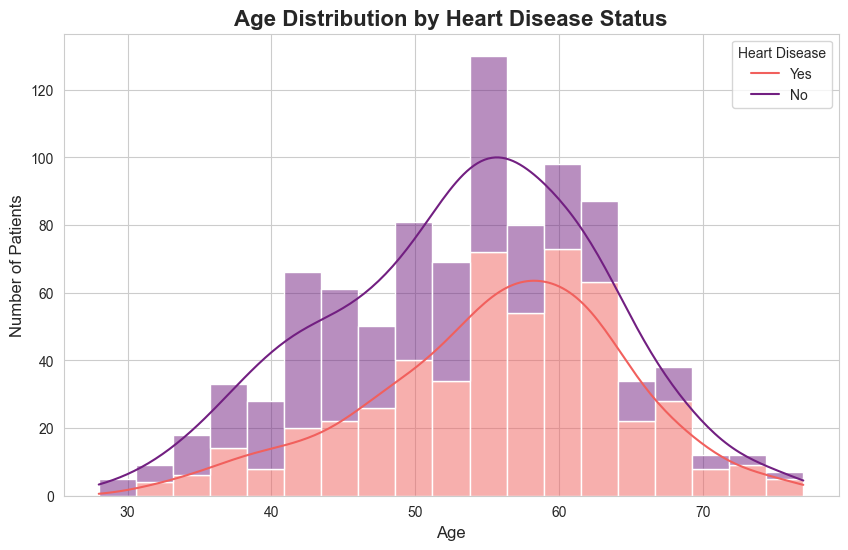

In [20]:
# Create a distribution plot for Age, separated by HeartDisease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='stack', kde=True, palette='magma')

plt.title('Age Distribution by Heart Disease Status', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='Heart Disease', labels=['Yes', 'No'])
plt.show()

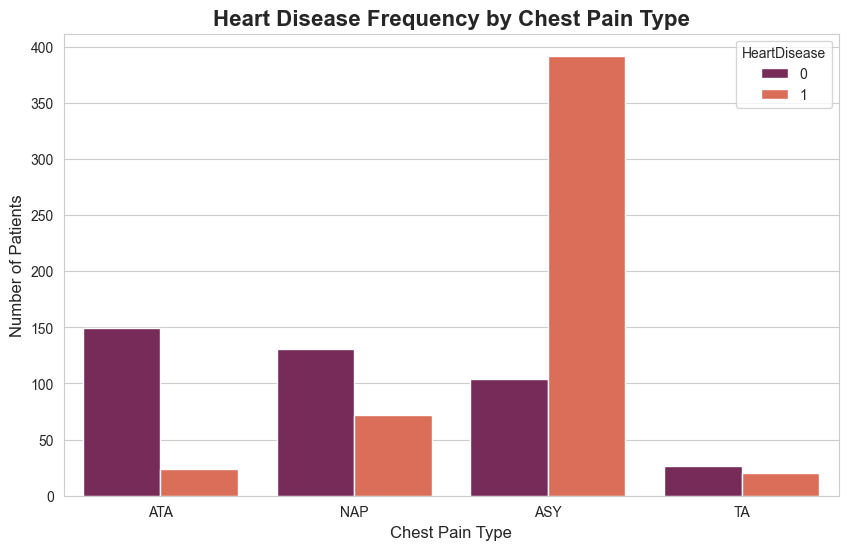

In [21]:
# Create a count plot for ChestPainType, separated by HeartDisease
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='rocket')

plt.title('Heart Disease Frequency by Chest Pain Type', fontsize=16, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

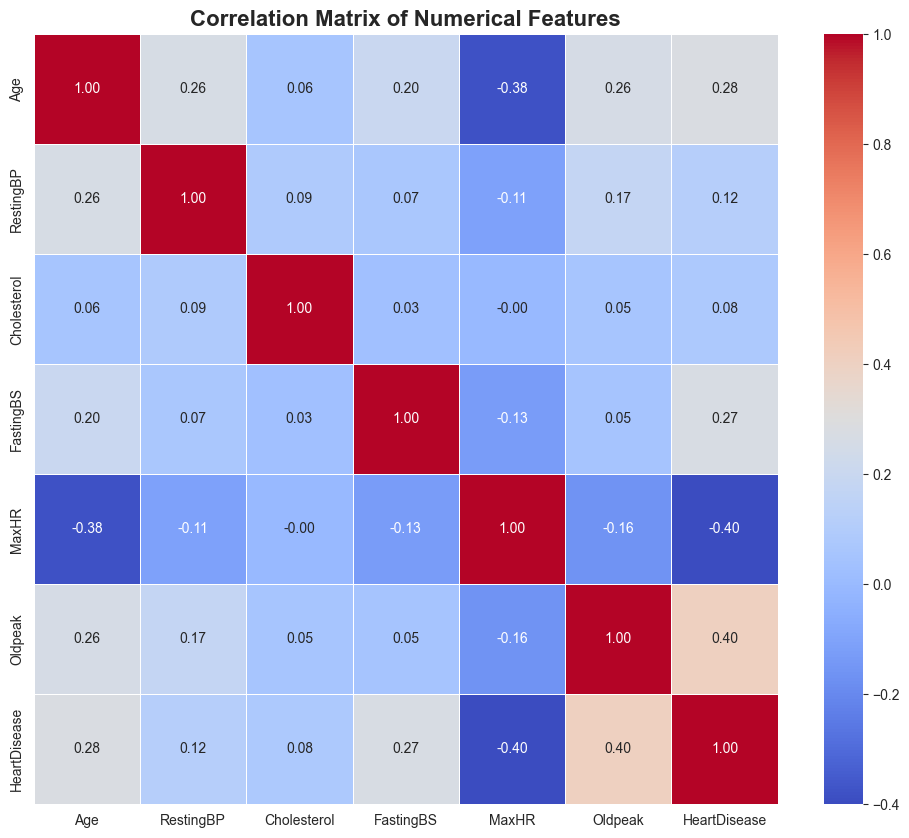

In [23]:
numerical_cols = df.select_dtypes(include =np.number)

#Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

#plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.show()

In [25]:
# Create a 'HeartStressIndex' as an interaction between MaxHR and RestingBP
# This can represent the overall workload on the heart.

df['HeartStressIndex'] = df['MaxHR'] * df['RestingBP']

In [27]:
# Create a ratio to see if cholesterol level is disproportionately high for a given age
df['CholesterolAgeRatio'] = df['Cholesterol'] / df['Age']

In [26]:
#Create a binary flag for high cholesterol(>240)
#.astype(int) converts the boolean(True/False) result into 1/0
df['IsHighCholesterol'] = (df['Cholesterol'] > 240).astype(int)

In [28]:
#Create a binary flag for patients older than 60
df['IsElderly'] = (df['Age']>60).astype(int)

In [31]:
#Create a permanent 'AgeCategory' feature
age_bins = [28, 40, 55, 65, 78] #Bins from min age to max ge
age_labels=['Adult (28-40)', 'Middle-Aged (41-55)', 'Senior (56-65)', 'Elderly (66-77)']

df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartStressIndex,IsHighCholesterol,CholesterolAgeRatio,IsElderly,AgeCategory
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,24080.0,1,7.225000,0,Middle-Aged (41-55)
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,24960.0,0,3.673469,0,Middle-Aged (41-55)
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,12740.0,1,7.648649,0,Adult (28-40)
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,14904.0,0,4.458333,0,Middle-Aged (41-55)
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,18300.0,0,3.611111,0,Middle-Aged (41-55)


In [35]:
# Group the DataFrame by 'Sex' and get descriptive statistics for 'Cholesterol'

cholesterol_by_sex = df.groupby('Sex')['Cholesterol'].describe()
print(cholesterol_by_sex)

     count        mean        std    min    25%    50%    75%    max
Sex                                                                 
F    193.0  255.761658  61.279437  141.0  211.0  249.0  288.0  564.0
M    725.0  239.906207  50.838496   85.0  215.0  235.0  261.0  603.0


C:\Users\Krm\AppData\Local\Temp\ipykernel_24672\3251324868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sex', y ='Cholesterol', palette='Set2')


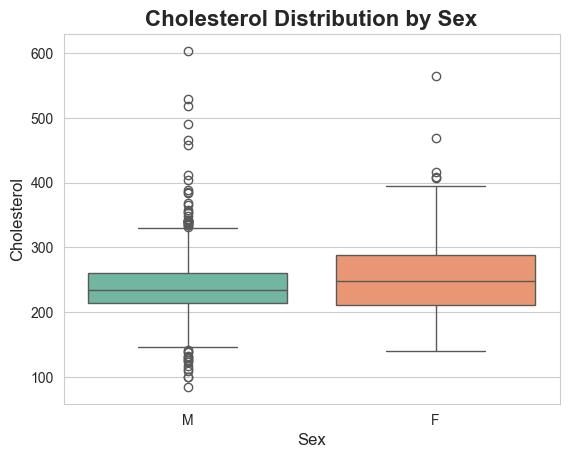

In [ ]:
# Create a box plot to visually compare Cholesterol distributions by Sex
sns.boxplot(data=df, x='Sex', y ='Cholesterol', palette='Set2')
plt.title('Cholesterol Distribution by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Cholesterol', fontsize=12)
plt.show()